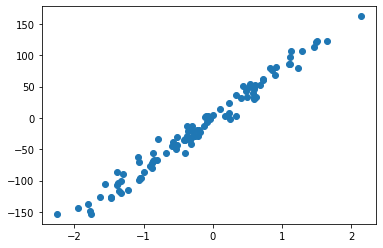

In [8]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_features=1, noise=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X, y);

In [7]:
class LinearRegression:
    
    def __init__(self, n_iter=100, alpha=0.01):
        self.n_iter = n_iter
        self.alpha = alpha
    
    @staticmethod
    def get_cost(X, target, params):
        m = len(X)
        cost = 0
        for x, y in zip(X, target):
            y_hat = np.dot(params, np.array([1, x]))
            cost += (y_hat - y) ** 2
            
        cost = cost / (2 * m)
        return cost
    
    def fit(self, X, y, debug=False):
        self.X = X
        self.y = y
        self.m = len(self.y)
        self.params = np.zeros(self.X.shape[1] + 1)
        
        for i in range(self.n_iter):
            for x, target in zip(self.X, self.y):
                y_hat = np.dot(self.params, np.array(np.insert(x, 0, 1)))
                gradient = np.array(np.insert(x, 0, 1)) * (target - y_hat)
                
                self.params += self.alpha * gradient / self.m
            
            if debug == True:
                print(get_cost(self.X, self.y, self.params))
                
    def predict(self, X):
        ones = np.array([1] * X.shape[0])[:, None]
        X_temp = np.append(ones, X, axis=1)
        
        y_pred = np.dot(X_temp, self.params)
        
        return y_pred

In [9]:
lr = LinearRegression(n_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

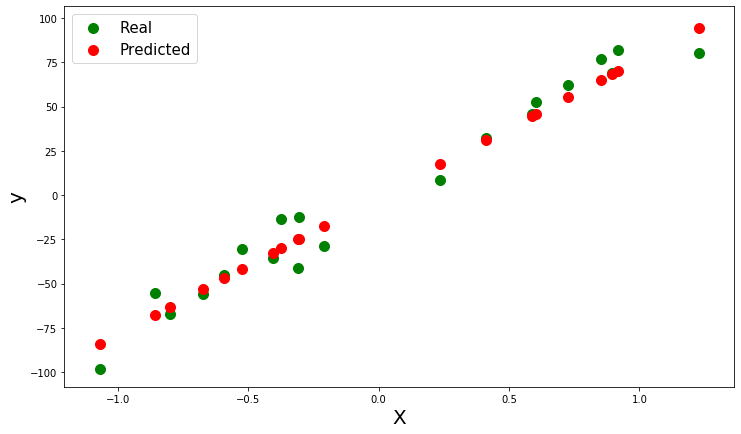

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(X_test, y_test, c='g', s=100, label='Real')
ax.scatter(X_test, y_pred, c='r', s=100, label='Predicted')
ax.legend(fontsize=15)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('y', fontsize=20);

In [11]:
from sklearn.linear_model import LinearRegression as SKLR

sklr = SKLR()
sklr.fit(X_train, y_train)
y_pred_sk = sklr.predict(X_test)

print('Scratch Algorithm RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('SK-Learn Algorithm RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_sk)))

Scratch Algorithm RMSE:  9.941638531863273
SK-Learn Algorithm RMSE:  9.857869422149426
